In [2]:
from dotenv import load_dotenv
import os
from vpc3_proyecto.model_evaluation.utils import get_last_checkpoint_folder
import torch
from transformers import VisionEncoderDecoderModel, DonutProcessor
env_path = os.path.join("..",".env")

found = load_dotenv(env_path)
print(f"✅ .env file {'found' if found else 'not found'}")
if not found:
    raise FileNotFoundError(f"Error: .env file not found at {env_path}")

torch.cuda.empty_cache()
donut_checkpoint_dir =os.path.join(os.getenv("CHECKPOINT_DIR"),'finetuned_donut_weights')#TODO: promptear al usuario detectando las carpetas dentro de checkpint directory para que elija que folder usar / que modelo guardado elegir
last_ckpt = get_last_checkpoint_folder(donut_checkpoint_dir)
manually_saved_folder = os.path.join(donut_checkpoint_dir+'/checkpoint-10873', "manually-saved")
print('model and processor loaded from:',manually_saved_folder)

if not os.path.exists(manually_saved_folder):
    raise FileNotFoundError(f"Error: manually-saved folder not found at {manually_saved_folder}")


processor = DonutProcessor.from_pretrained(manually_saved_folder)

model = VisionEncoderDecoderModel.from_pretrained(
    manually_saved_folder,
    device_map="auto",
    torch_dtype=torch.float16  
)

print('model and processor loaded from:',manually_saved_folder)

model.config.decoder_start_token_id = processor.tokenizer.pad_token_id
model.config.pad_token_id = processor.tokenizer.pad_token_id


✅ .env file found
model and processor loaded from: /home/juan/CEIA/vpc3-proyecto/vpc3_proyecto/models/finetuned_donut_weights/checkpoint-10873/manually-saved
model and processor loaded from: /home/juan/CEIA/vpc3-proyecto/vpc3_proyecto/models/finetuned_donut_weights/checkpoint-10873/manually-saved


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.58.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


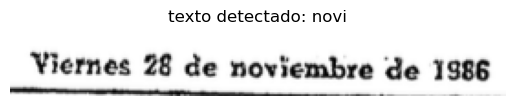

Texto detectado: novi


In [3]:
from PIL import Image
import torch

image_path = "../../imgs/date.png"
try:
    image = Image.open(image_path).convert("RGB")
except FileNotFoundError:
    print(f"Error: Image not found at {image_path}")
    exit()

from vpc3_proyecto.visualization.infer_from_image import infer_text_from_image
task_prompt = "<s>"

result_text = infer_text_from_image(image, model, processor,task_prompt=None,show_image=True)
print("Texto detectado:", result_text)